terrain cross section with dem

In [8]:
import numpy as np
import rasterio
from affine import Affine
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

# Load the DEM data
with rasterio.open(r'C:\Users\eslam _gis\Downloads\baha_aseer.tif') as src:
    dem = src.read(1)
    transform = src.transform

In [9]:
# Define the start and end points of your cross section
start_lon, start_lat = 20,41
end_lon, end_lat = 18,42
# Convert the start and end points to pixel coordinates
start_x, start_y = Affine(*transform) * (start_lon, start_lat)
end_x, end_y = Affine(*transform) * (end_lon, end_lat)

# Extract elevation data along the path
x = np.arange(dem.shape[1])
y = np.arange(dem.shape[0])
interp_func = interp2d(x, y, dem, kind='cubic')
path_x = np.linspace(start_x, end_x, 100)
path_y = np.linspace(start_y, end_y, 100)
path_z = interp_func(path_x, path_y)

C:\Users\eslam _gis\AppData\Local\Temp\ipykernel_7216\3770981565.py:11: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interp_func = interp2d(x, y, dem, kind='cubic')
C:\Users\eslam _gis\AppData\Local\Temp\ipykernel_7216\3770981565.py:14: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
 

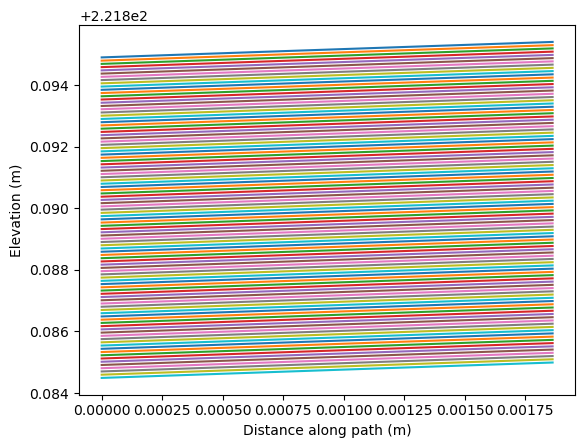

In [10]:
# Plot the cross section
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.sqrt((path_x - start_x)**2 + (path_y - start_y)**2), path_z)
ax.set_xlabel('Distance along path (m)')
ax.set_ylabel('Elevation (m)')
plt.show()

other example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
# Load the DEM data
dem = tifffile.imread(r'C:\Users\eslam _gis\Downloads\newexample.tif')

# Define the start and end points of your cross section
start_x, start_y = 18, 42
end_x, end_y = 19, 42


In [2]:
# Create a grid of x and y coordinates
x, y = np.meshgrid(np.linspace(start_x, end_x, dem.shape[1]),
                   np.linspace(start_y, end_y, dem.shape[0]))

# Extract the elevation data along the path
row = np.round(np.interp(x[0], [start_x, end_x], [0, dem.shape[0]-1])).astype(int)
col = np.round(np.interp(y[:, 0], [start_y, end_y], [0, dem.shape[1]-1])).astype(int)
elev = dem[row, col]

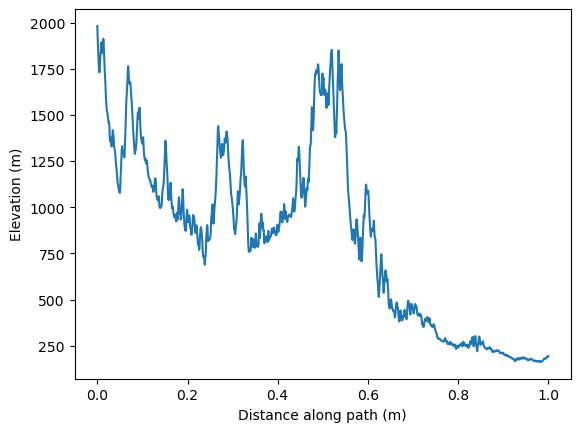

In [3]:

# Plot the cross section
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.sqrt((x[0] - start_x)**2 + (y[:, 0] - start_y)**2), elev)
ax.set_xlabel('Distance along path (m)')
ax.set_ylabel('Elevation (m)')
plt.show()